In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#----------------------------------------
mpl.rcParams['xtick.color'] = 'tab:blue'
mpl.rcParams['ytick.color'] = 'tab:blue'
mpl.rcParams['axes.labelcolor'] = 'tab:blue'
#----------------------------------------

palette = sns.color_palette('deep',20)
rc={"axes.edgecolor": "black"}
sns.set_style("whitegrid", {"grid.color": "tab:blue", "grid.linestyle": ":"})
sns.set_style({'axes.ax': "tab:blue"})
sns.set_style({'axes.facecolor': 'white'})

In [2]:
#on importe la base de données
source = os.getcwd()

In [3]:
for repertoire_actuel, sous_repertoires, fichiers in os.walk(source):
    print('Sous-répertoires :', sous_repertoires)
    print('Fichiers :', fichiers)

Sous-répertoires : ['data', 'livrable', '.ipynb_checkpoints']
Fichiers : ['pca_graphique.ipynb', 'Clustering K_means.ipynb', 'olis_exploration.ipynb', 'Maintenance.ipynb']
Sous-répertoires : ['source', 'cleaned']
Fichiers : []
Sous-répertoires : []
Fichiers : ['olist_order_payments_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_reviews_dataset.csv', 'product_category_name_translation.csv', 'olist_customers_dataset.csv', 'olist_order_items_dataset.csv']
Sous-répertoires : ['.ipynb_checkpoints']
Fichiers : ['maintenance.csv', 'customers.csv', 'customers_plus.csv']
Sous-répertoires : []
Fichiers : []
Sous-répertoires : []
Fichiers : ['Guillerm_bryan_1_notebook_exporation_avril_2023.ipynb']
Sous-répertoires : []
Fichiers : ['Maintenance-checkpoint.ipynb', 'olis_exploration-checkpoint.ipynb', 'pca_graphique-checkpoint.ipynb', 'Clustering K_means-checkpoint.ipynb']


In [4]:
chemin = 'data/cleaned/customers.csv'
customers_df = pd.read_csv(chemin, index_col = 0)

In [5]:
customers_df.shape

(93372, 7)

In [6]:
customers_df.dtypes

customer_unique_id        object
nbre_achat                 int64
quantite_achat_max         int64
paiement_moyen           float64
temps_livraison_moyen      int64
review_score_moyen       float64
NJDA                       int64
dtype: object

In [7]:
#on trasforme les valeursde la variable temps de livraison en jours
customers_df['temps_livraison_moyen'] = pd.to_timedelta(customers_df['temps_livraison_moyen'], unit='ns').dt.days

In [8]:
customers_df.isna().sum()

customer_unique_id          0
nbre_achat                  0
quantite_achat_max          0
paiement_moyen              0
temps_livraison_moyen    1917
review_score_moyen          0
NJDA                        0
dtype: int64

In [9]:
mean = customers_df['temps_livraison_moyen'].mean()
customers_df['temps_livraison_moyen'].fillna(mean, inplace = True)

In [10]:
customers_df['temps_livraison_moyen'].describe()

count    93372.000000
mean        12.453589
std          9.367995
min          0.000000
25%          7.000000
50%         10.000000
75%         15.000000
max        208.000000
Name: temps_livraison_moyen, dtype: float64

## Préparation du dataset

In [11]:
#Selection d'un echantillon pour certain graphique ou entrainement
customers_sample_df = customers_df.sample(frac = 0.1)

In [12]:
#on scaled les donées
scaled = make_column_transformer((StandardScaler(), customers_df.select_dtypes(exclude ='object').columns),
                                 remainder = 'passthrough',
                                 verbose_feature_names_out = False)

In [13]:
customers_scaled_df = pd.DataFrame(scaled.fit_transform(customers_df),
                                         columns = scaled.get_feature_names_out())
customers_scaled_df.head(3)

,nbre_achat,quantite_achat_max,paiement_moyen,temps_livraison_moyen,review_score_moyen,NJDA,customer_unique_id
0,-0.175271,0.0,-0.422472,0.69881,0.675921,0.257007,d8eafc07c9e450d0bddbf75e0c6562ae
1,-0.175271,0.0,-0.279245,-1.115889,0.675921,-1.172812,e4019dc45b2d51954e9cca5b62c83bb2
2,-0.175271,0.0,0.162678,-0.795648,-0.079106,-1.349091,f3c66d5bafea434a46cc6006b62569cf


In [14]:
customers_sample_scaled_df = pd.DataFrame(scaled.fit_transform(customers_sample_df),
                                         columns = scaled.get_feature_names_out())
customers_sample_scaled_df.head(3)

,nbre_achat,quantite_achat_max,paiement_moyen,temps_livraison_moyen,review_score_moyen,NJDA,customer_unique_id
0,-0.16386,0.0,-0.348097,-0.714473,-0.815603,-0.006145,4d35276095e7c9b9f81ab155d0bdfdb4
1,-0.16386,0.0,-0.582117,-1.046117,-2.316025,-0.343552,8992745cdc9cfed4819746d05642f6b6
2,-0.16386,0.0,-0.300083,0.169913,-0.065392,-0.155382,876809bd6fa6123648eb9b79300c5d13


## Mise en place d'une PCA pour une premiere visualisation

In [15]:
#selection des variables
features = ['nbre_achat','quantite_achat_max','paiement_moyen','temps_livraison_moyen','review_score_moyen','NJDA']    
X = customers_df[features].values


In [16]:
#On scale les données 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#on effectue la PCA
n_components = 4
from sklearn.decomposition import PCA
pca =PCA(n_components = n_components)
pca.fit(X_scaled)

PCA(n_components=4)

In [18]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([27.2 , 20.96, 19.62, 18.87])

In [19]:
scree_cum = scree.cumsum().round(2)
scree_cum

array([27.2 , 48.16, 67.78, 86.65])

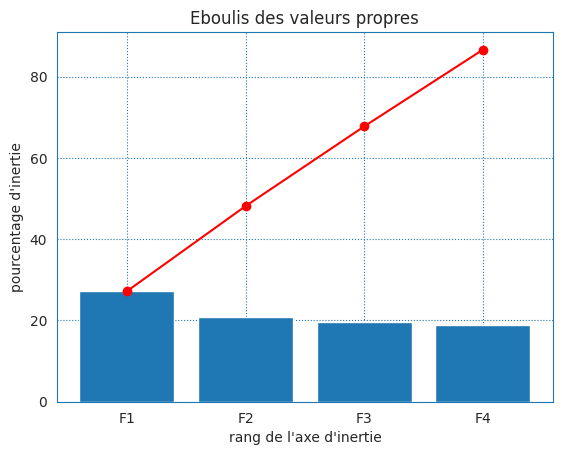

In [20]:
x_list = range(1, n_components +1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')

plt.gca().spines['bottom'].set_color('tab:blue')
plt.gca().spines['top'].set_color('tab:blue')
plt.gca().spines['left'].set_color('tab:blue')
plt.gca().spines['right'].set_color('tab:blue')

plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")


plt.xticks(np.arange(1, 5, step=1))  # Set label locations.
plt.xticks(np.arange(1,5), ['F1', 'F2', 'F3', 'F4'])  # Set text labels.

plt.show(block=False)

In [21]:
#On apporte une fonction que j ai crée pour faire les graphiques
import sys
sys.path.append('/home/bryan/mesmodules')
import pcagraphique
from pcagraphique import correlation_graph, display_factorial_planes

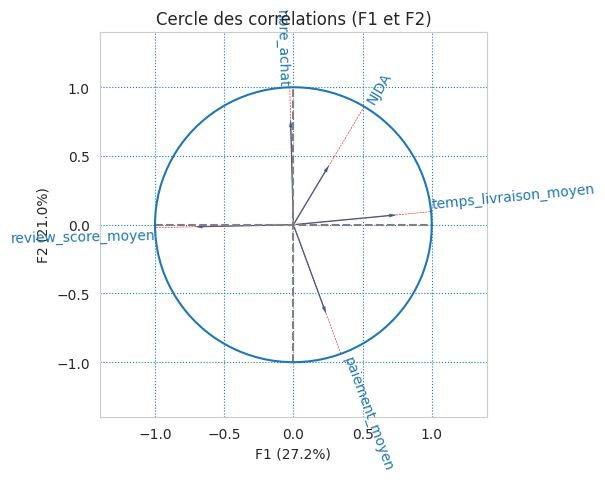

In [22]:
x_y =(0,1)
correlation_graph(pca, x_y, features, figsize = (5,5))

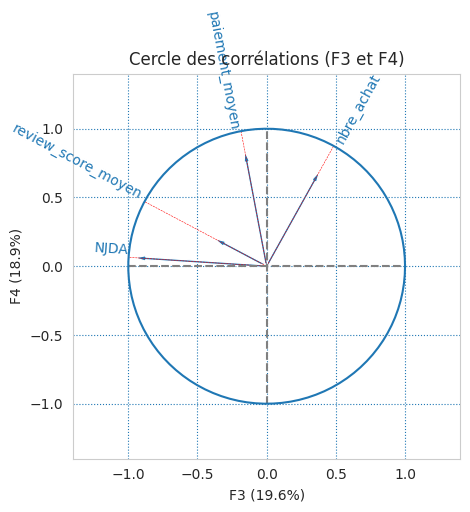

In [23]:
x_y =(2,3)
correlation_graph(pca, x_y, features, figsize = (5,5))

In [24]:
X_proj = pca.transform(X_scaled)

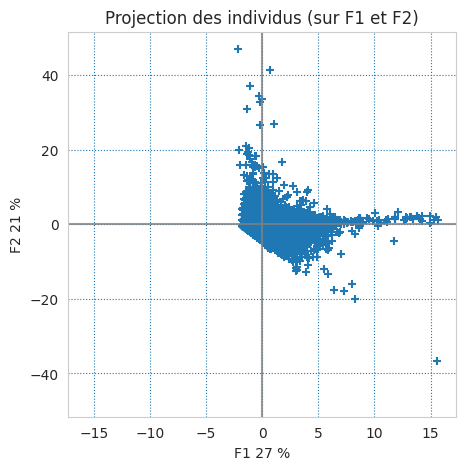

In [25]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(5,5),fontsize = 20, marker="+")

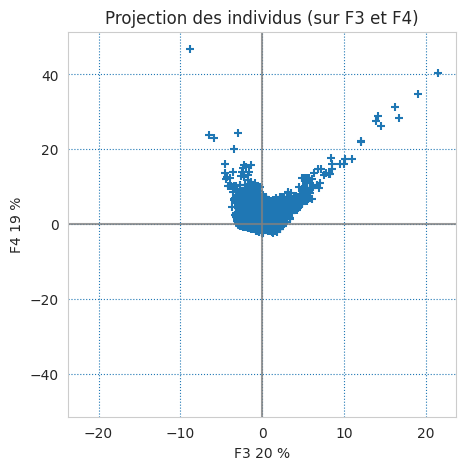

In [26]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, figsize=(5,5),fontsize = 20, marker="+")

## Clustering avec kmeans ++

In [27]:
features = ['NJDA','nbre_achat','payement_moyen']

In [28]:
#Creation d'une fonction qui retourne inertia, label, centroids et silhouette score
from sklearn.cluster import KMeans
from sklearn import metrics

def KMeans_algorithm(data, n,df =customers_scaled_df):
    clustering_KMeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, random_state = 0, algorithm = "elkan")
    clustering_KMeans.fit(data)
    
    #dataframe composée des centroides
    centroids = clustering_KMeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns = ['X', 'Y'])
    
    #add cluster label for each datpoint
    label = clustering_KMeans.labels_
    df.loc[:,'label'] =label
    
    #evaluation metrics for clustering - inertia and silhouette score
    inertia = clustering_KMeans.inertia_
    silhouette_score = metrics.silhouette_score(data, label)
    
    return inertia, label, centroids_df, silhouette_score
    

In [29]:
#Creation d'une fonction qui retourne un graphique pour chaque nombre de clusters
def graph_clusters_bivarié(data,v1 = 'NJDA',  v2 = 'nbre_achat', df = customers_scaled_df):

    import warnings
    warnings.filterwarnings('ignore')

    inertia_values = []
    silhouette_scores = []

    fig1 = plt.figure(figsize=(20,20))
    for i in range(2,11):
        #on va utiliser le fonction KMeans_algorithm créée précedemment
        inertia, label, centroids, silhouette = KMeans_algorithm(data,i,df)
        inertia_values.append(inertia)
        silhouette_scores.append(silhouette)
        centroids_df  = pd.DataFrame(centroids, columns =['X', 'Y'])

        sub = fig1.add_subplot(330 + i -1)
        #on selectionne un echantillon

        sub.scatter(data = df, x =v1,
                    y=v2, s =25, c=df['label'],
                    cmap ="Set3_r")
        sub.scatter(data = centroids_df, x= 'X', y='Y',s =60, marker ="v", color ="black")
        sub.set_title(f"{i} clusters")
        sub.set_xlabel(v1)
        sub.set_ylabel(v2)
        
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(2,11), inertia_values)
    plt.title('Inertie')
    plt.xlabel('Nombre de cluster')
    plt.ylabel('Inertie')
    
    #silhouette score et nombre de cluster
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(2,11), silhouette_scores)
    plt.title('silhouette score')
    plt.xlabel('Nombre de cluster')
    plt.ylabel('silhouette')
    plt.show()

    plt.show()

In [30]:
cmap_names = mpl.cm.cmap_d.keys()
print(list(cmap_names))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

### Clustering bi variée

In [31]:
customers_scaled_df.columns

Index(['nbre_achat', 'quantite_achat_max', 'paiement_moyen',
       'temps_livraison_moyen', 'review_score_moyen', 'NJDA',
       'customer_unique_id'],
      dtype='object')

In [32]:
#Dans cette methode on regarde la formation en se concentrant sur les couples de variables
#Toutes les features
X = customers_scaled_df[['NJDA','nbre_achat','paiement_moyen']].values
X_sample = customers_sample_scaled_df[['NJDA','nbre_achat','paiement_moyen']].values
#Nbj_dernier_achat x nombre_achat
X1_X2 = customers_scaled_df[['NJDA','nbre_achat']].values
X1_X2_sample = customers_sample_scaled_df[['NJDA','nbre_achat']].values
#Nbj_dernier_achat x payement_moyen
X1_X3 = customers_scaled_df[['NJDA','paiement_moyen']].values
X1_X3_sample = customers_sample_scaled_df[['NJDA','paiement_moyen']].values
#nombre_achat x payement_moyen
X2_X3 = customers_scaled_df[['nbre_achat','paiement_moyen' ]].values
X2_X3_sample = customers_sample_scaled_df[['nbre_achat','paiement_moyen' ]].values

###  Nombre achat Vs NJDA (Nombe de Jour depuis Dernier Achat)

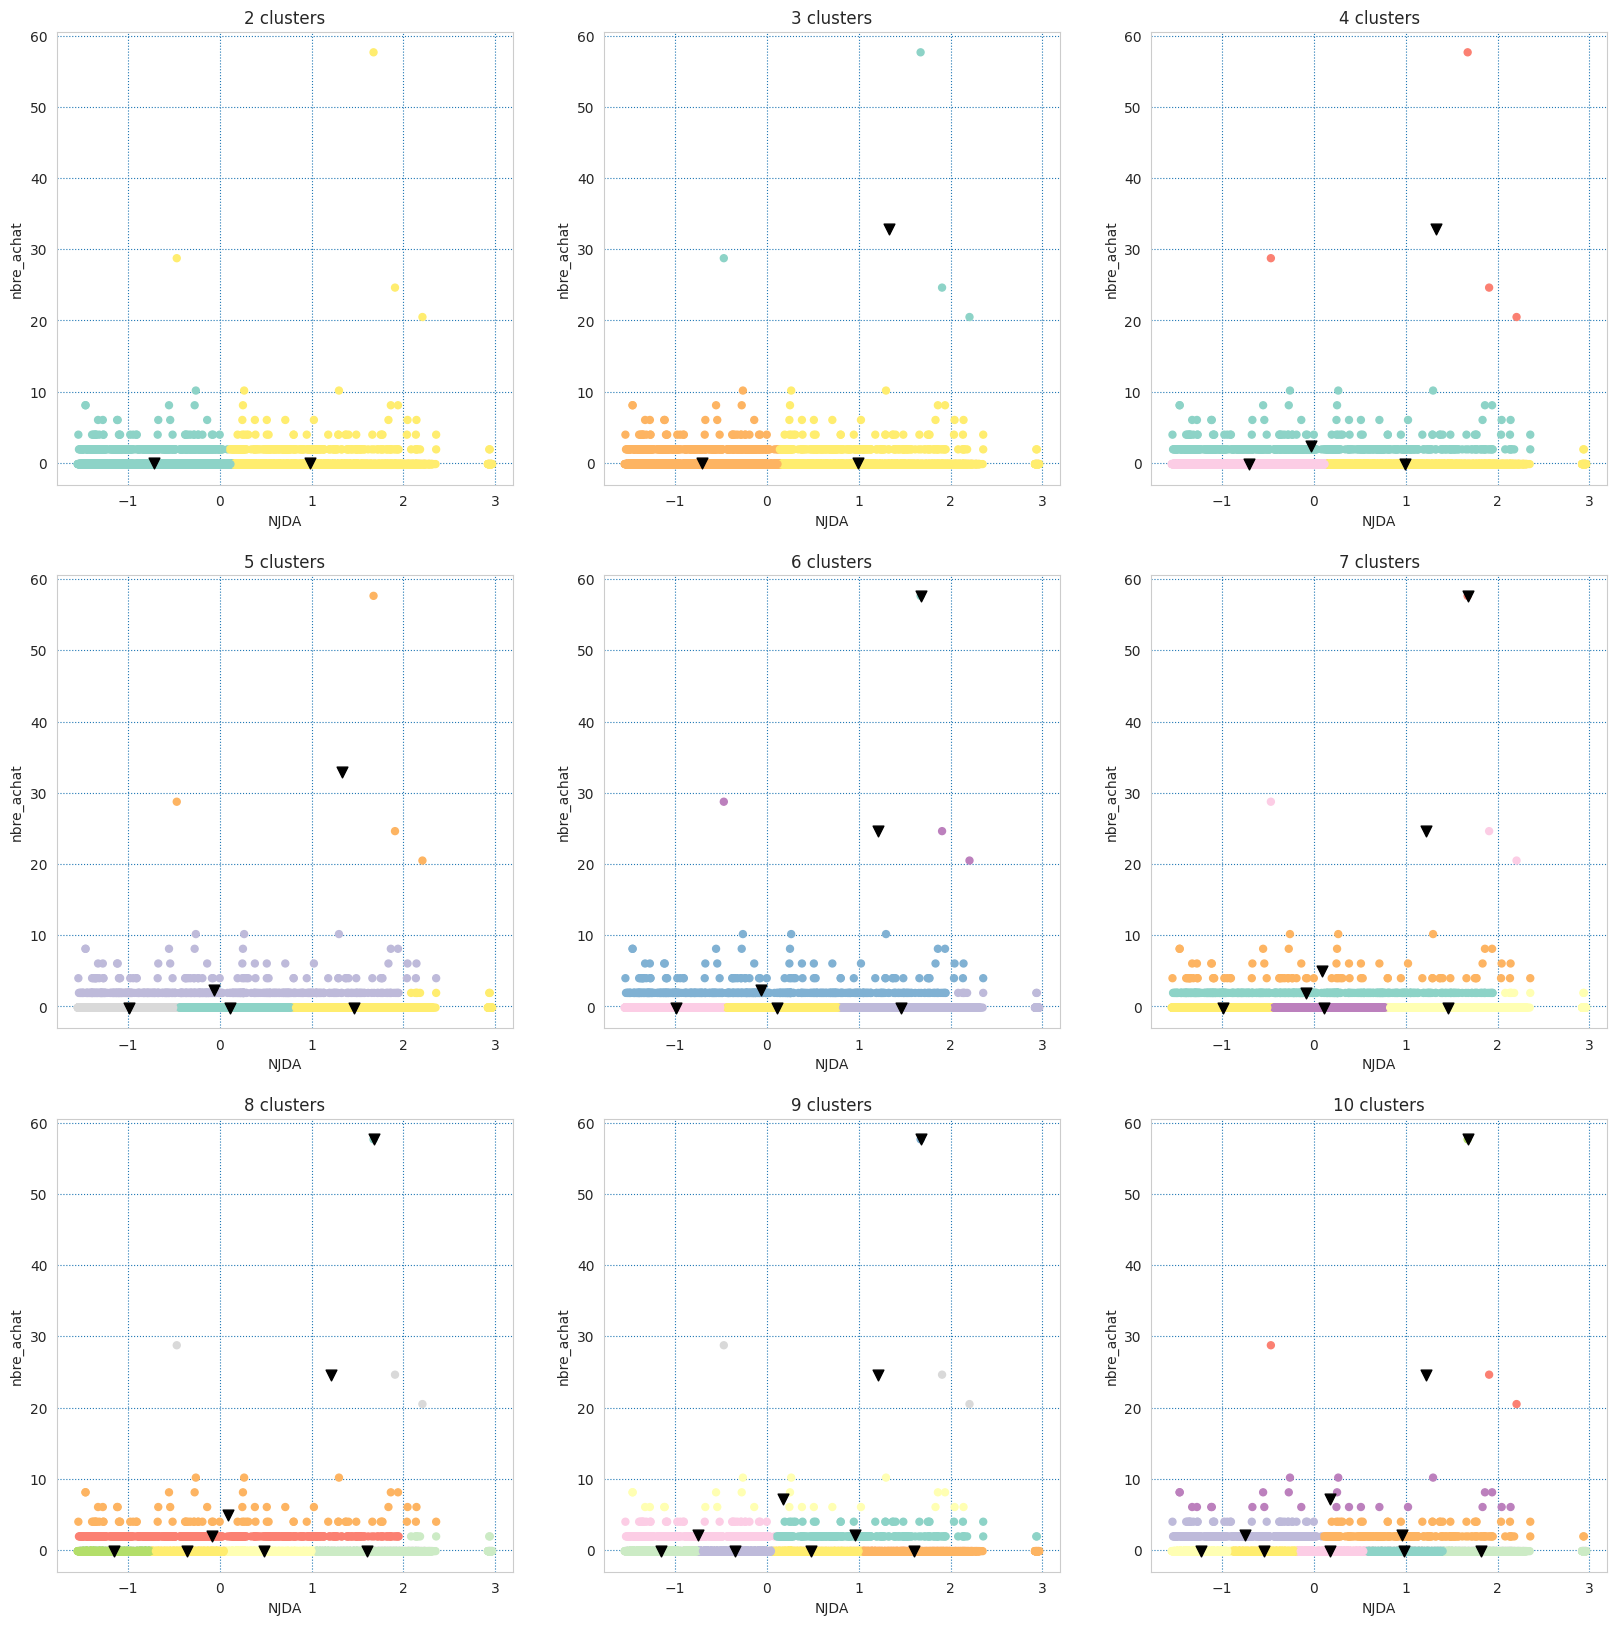

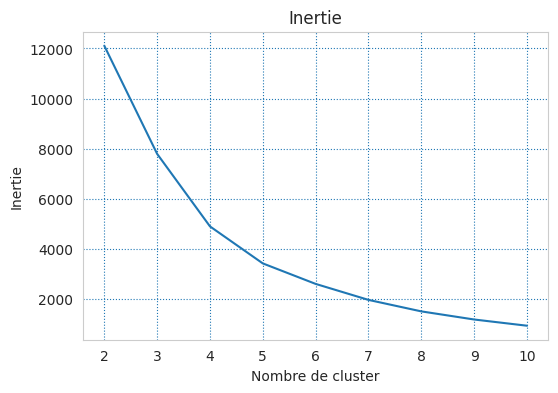

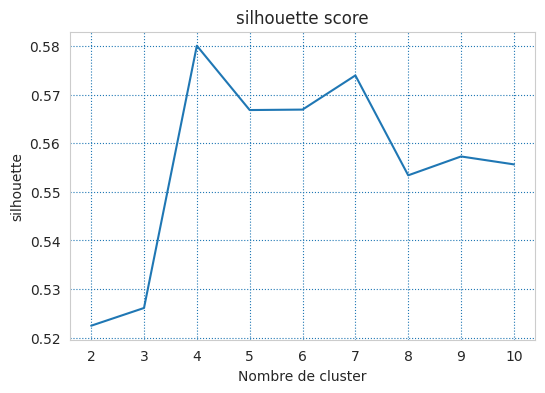

In [33]:
data = X1_X2_sample
df =customers_sample_scaled_df
graph_clusters_bivarié(data = data ,v1 = 'NJDA',  v2 = 'nbre_achat', df=df)

### NJDA (Nombe de Jour depuis Dernier Achat) vs paiement moyen

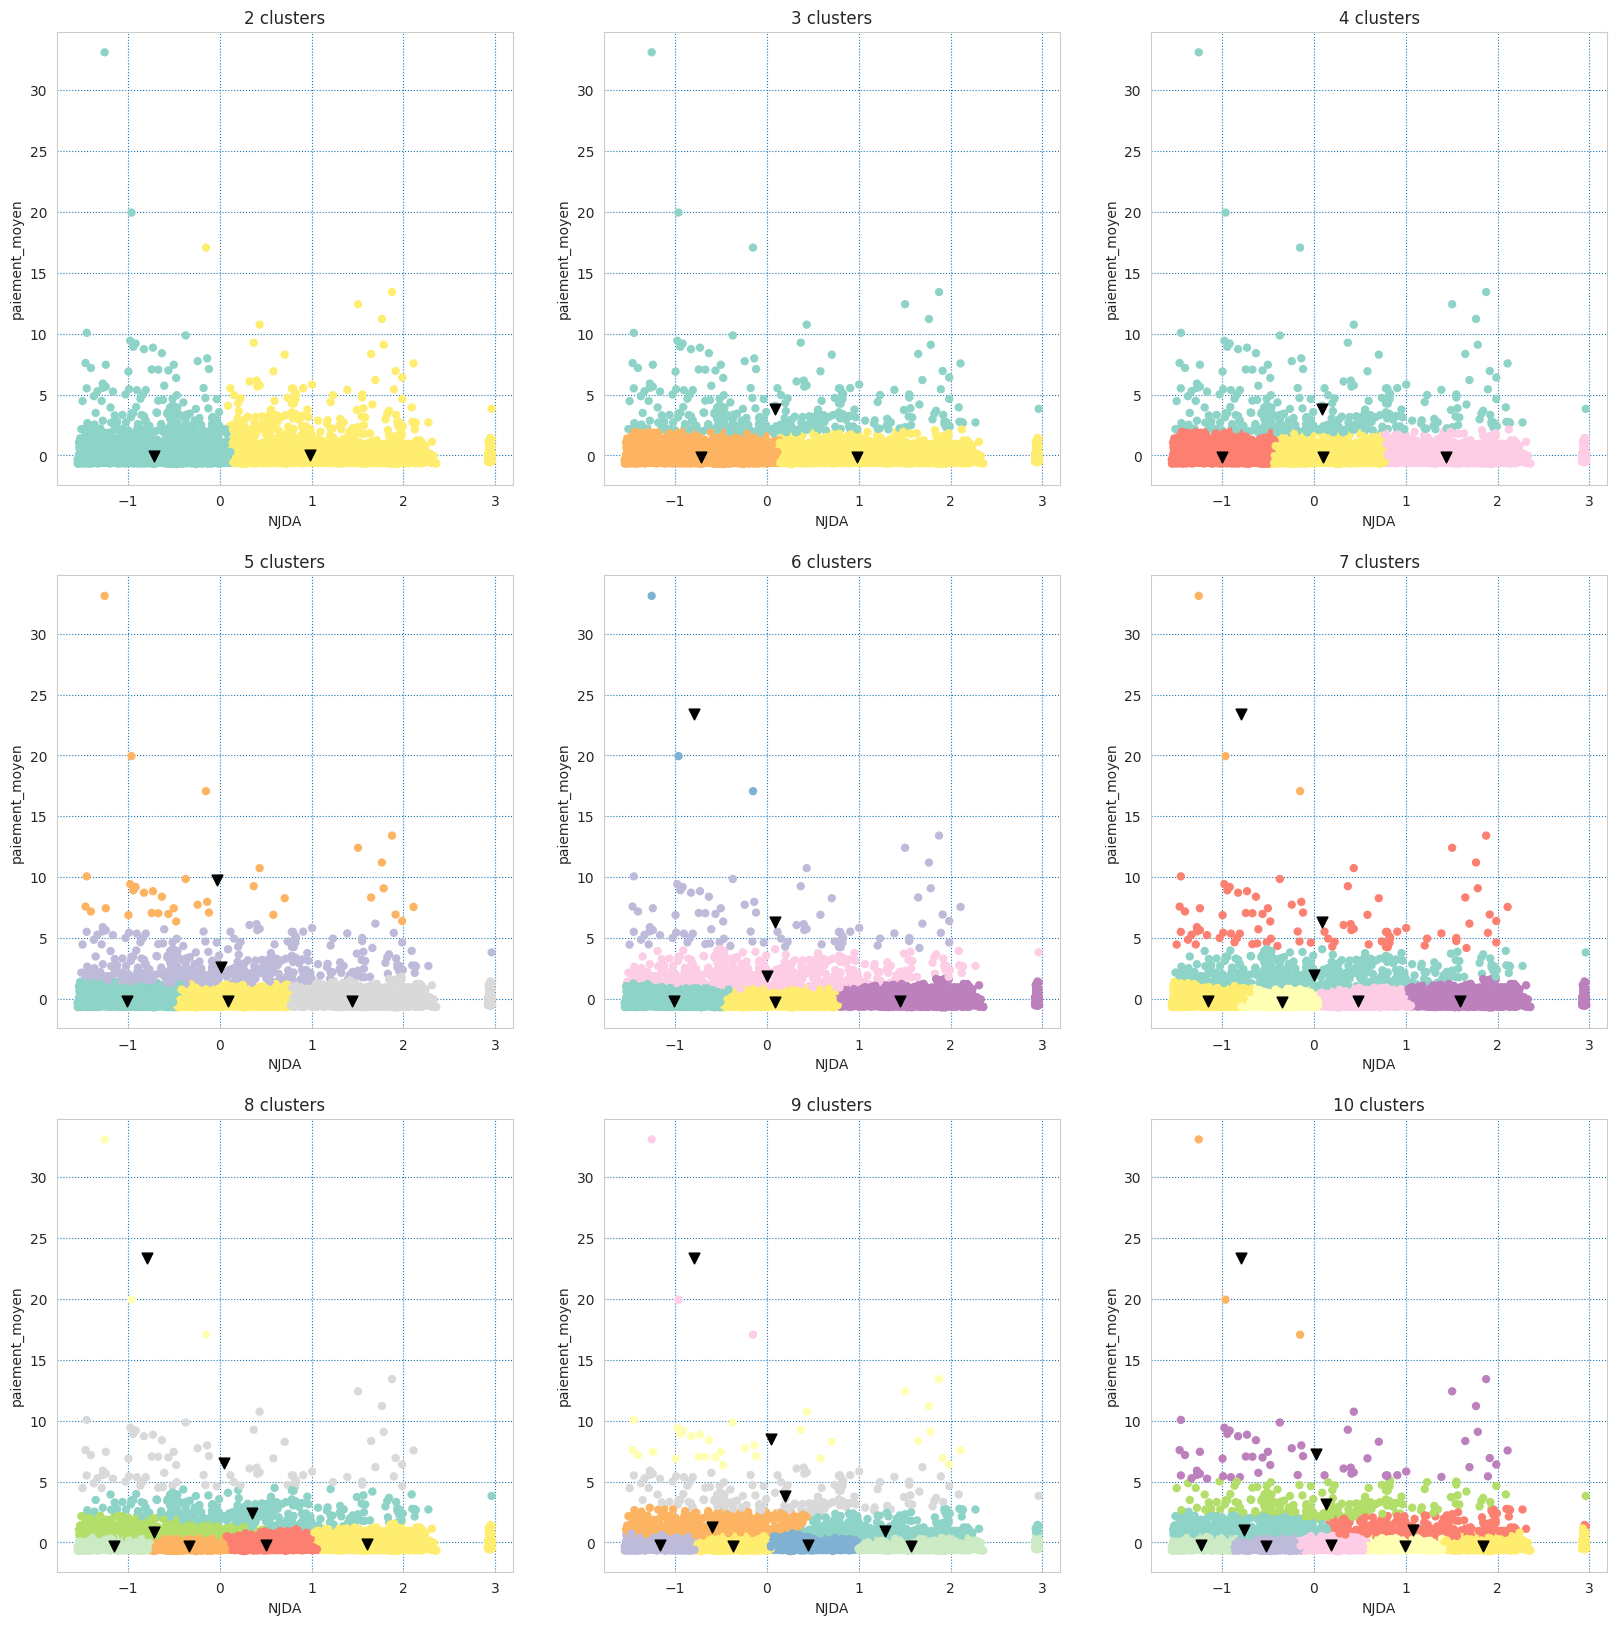

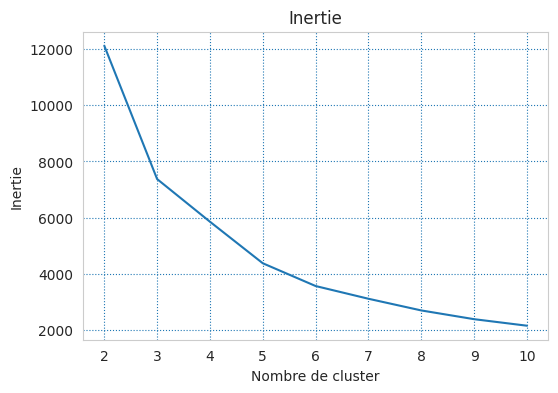

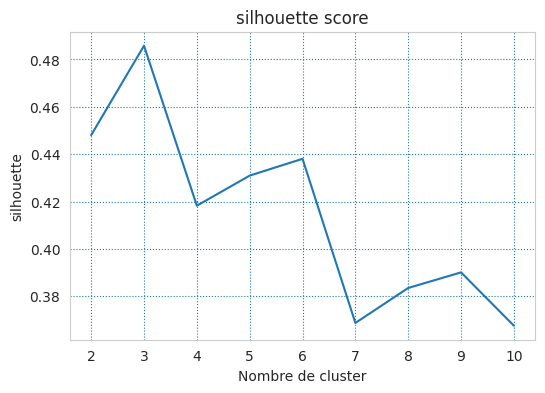

In [34]:
data = X1_X3_sample
df =customers_sample_scaled_df
graph_clusters_bivarié(data = data, v1 = 'NJDA', v2 = 'paiement_moyen', df=df)

### Nombre d'achat Vs paiement moyen

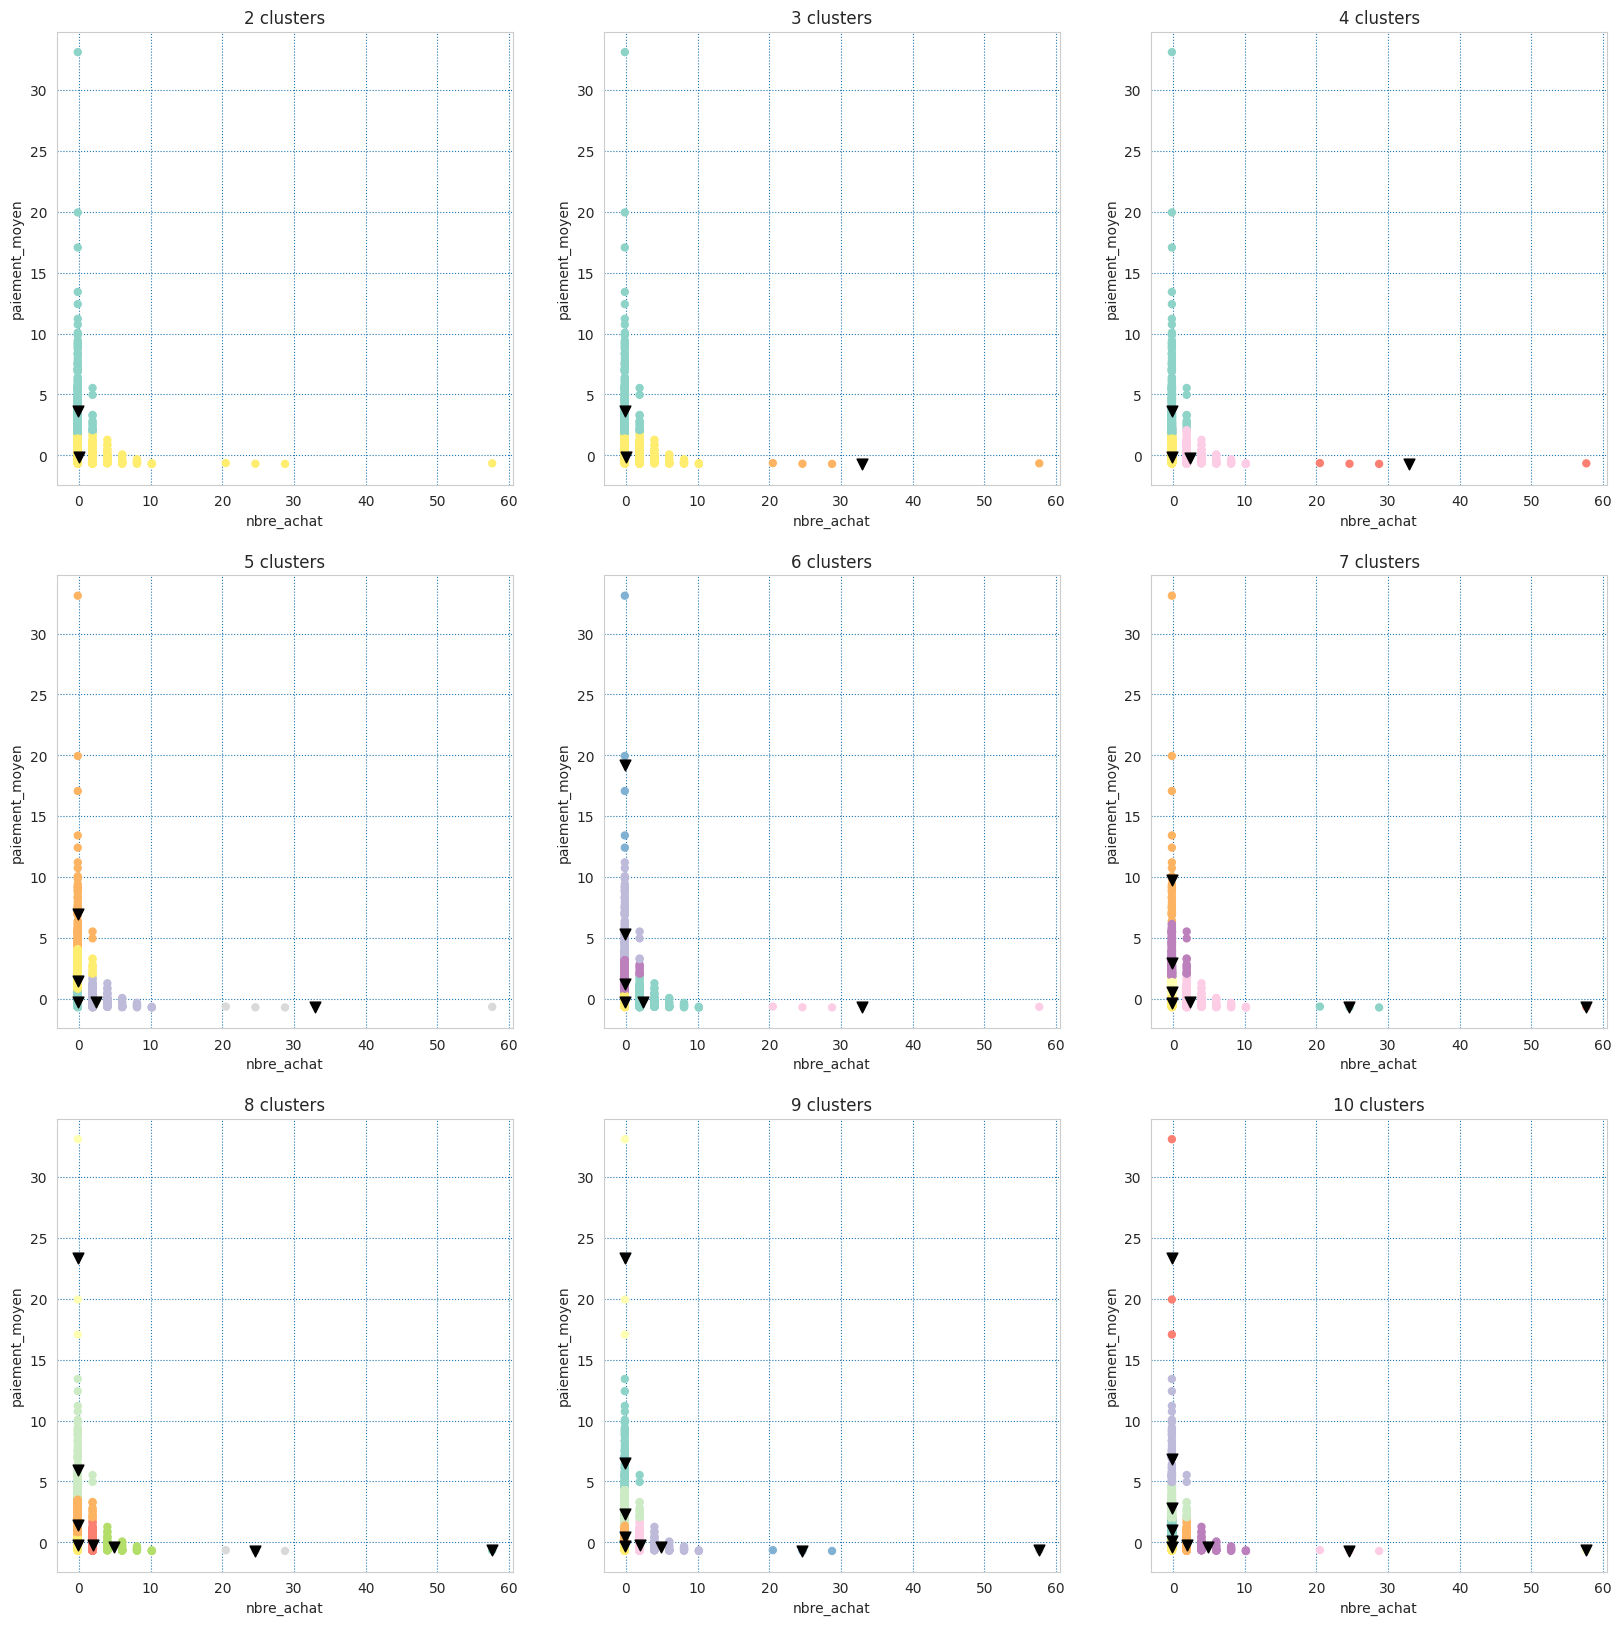

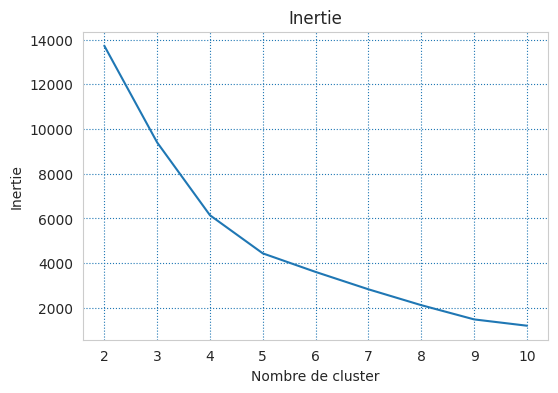

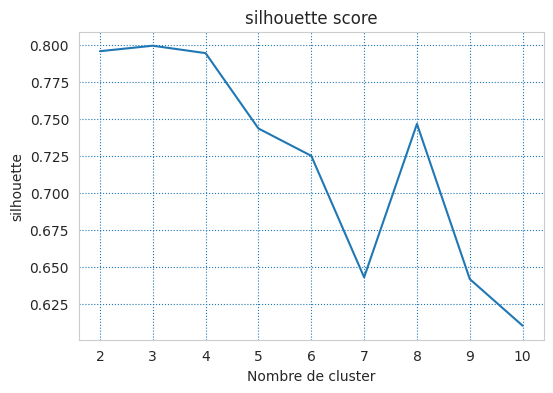

In [35]:
data = X2_X3_sample
df =customers_sample_scaled_df
graph_clusters_bivarié(data = data, v1 = 'nbre_achat', v2 = 'paiement_moyen', df=df)

## Inertie et silhouette avec avec 3 variable

In [36]:
KMeans.__init__

<function sklearn.cluster._kmeans.KMeans.__init__(self, n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')>

In [37]:

silhouette_score =[]
inertia_values = []
for i in range(2,12):
    clustering_kmeans = KMeans(n_clusters = i ,max_iter = 300, init = 'k-means++', random_state = 0, algorithm = "elkan")
    clustering_kmeans.fit(X_sample)
    #label, inertie et silhouette
    labels = clustering_kmeans.labels_
    inertia = clustering_kmeans.inertia_
    silhouette = metrics.silhouette_score(X_sample, labels)
    #on ajoute l'inertie et le score de silhouette
    inertia_values.append(inertia)
    silhouette_score.append(silhouette)

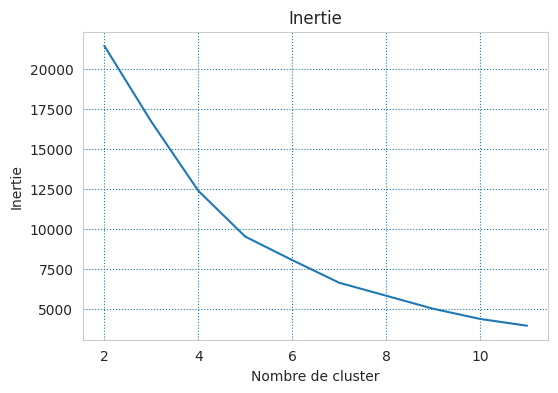

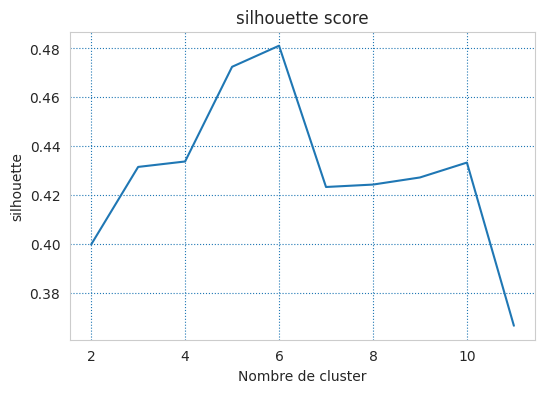

In [38]:
#grahique

#value_score et inertie
plt.figure(figsize=(6,4))
plt.plot(np.arange(2,12), inertia_values)
plt.title('Inertie')
plt.xlabel('Nombre de cluster')
plt.ylabel('Inertie')
    
#silhouette score et nombre de cluster
plt.figure(figsize=(6,4))
plt.plot(np.arange(2,12), silhouette_score)
plt.title('silhouette score')
plt.xlabel('Nombre de cluster')
plt.ylabel('silhouette')
plt.show()

# 3 Clustering

## 3.1 - clusters n=4

In [39]:
kmeans_cl = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, random_state = 0, algorithm = "elkan")

In [40]:
kmeans_cl.fit(X)

KMeans(algorithm='elkan', n_clusters=4, random_state=0)

In [41]:
kmeans_cl.labels_

array([1, 2, 2, ..., 2, 2, 2], dtype=int32)

In [42]:
customers_df['label'] = kmeans_cl.labels_

In [43]:
customers_df['label'].value_counts()

2    51524
1    37816
0     2853
3     1179
Name: label, dtype: int64

In [44]:
pd.DataFrame({'clusters':customers_df['label'].value_counts().index,
              'Nb individu' :customers_df['label'].value_counts()}).sort_values(by ='clusters')

,clusters,Nb individu
0,0,2853
1,1,37816
2,2,51524
3,3,1179


## 3.1.1 - Analyse metier des clusters

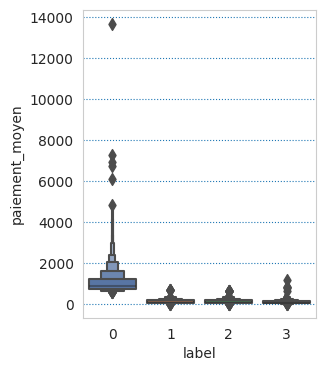

In [45]:
df_graph = customers_df
fig = plt.figure(figsize=(3,4))
sns.boxenplot(data = df_graph, x = 'label', y='paiement_moyen', palette = palette)

plt.show()

<Figure size 300x400 with 0 Axes>

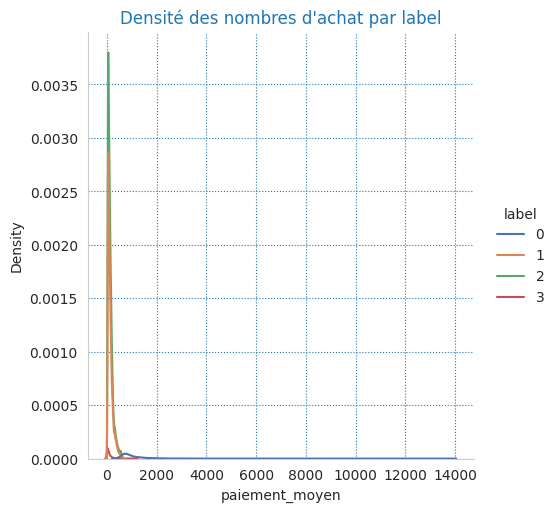

In [46]:
fig = plt.figure(figsize=(3,4))
sns.displot(df_graph, x='paiement_moyen', kind="kde", hue = 'label', palette = palette)
plt.title("Densité des nombres d'achat par label", c = 'tab:blue')
plt.show()

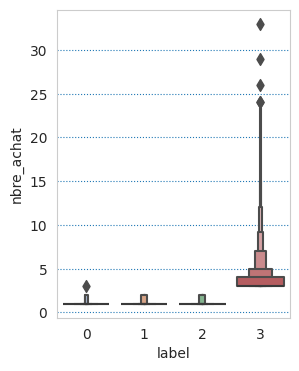

In [47]:
fig = plt.figure(figsize=(3,4))
sns.boxenplot(data = df_graph, x = 'label', y='nbre_achat', palette = palette)
plt.show()

<Figure size 300x400 with 0 Axes>

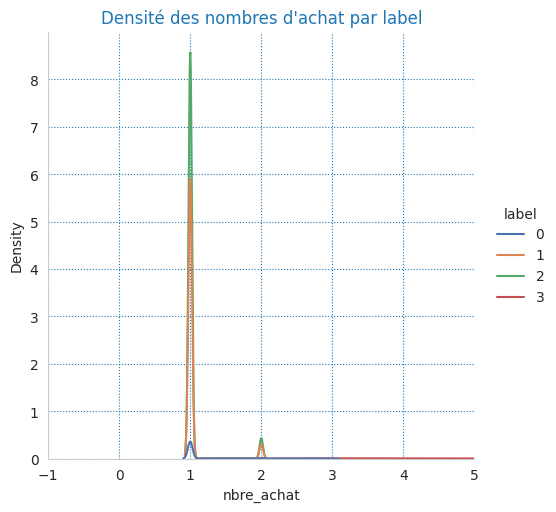

In [48]:
fig = plt.figure(figsize=(3,4))
sns.displot(df_graph, x='nbre_achat', kind="kde", hue = 'label', palette = palette)
plt.title("Densité des nombres d'achat par label", c = 'tab:blue')
plt.xlim(-1,5)
plt.show()

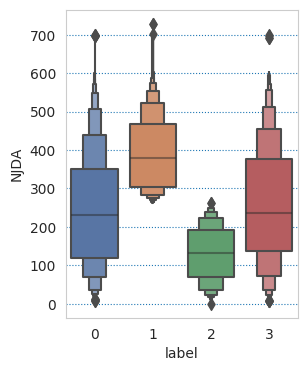

In [49]:
fig = plt.figure(figsize=(3,4))
sns.boxenplot(data = df_graph, x = 'label', y='NJDA', palette = palette)
plt.show()

<Figure size 300x400 with 0 Axes>

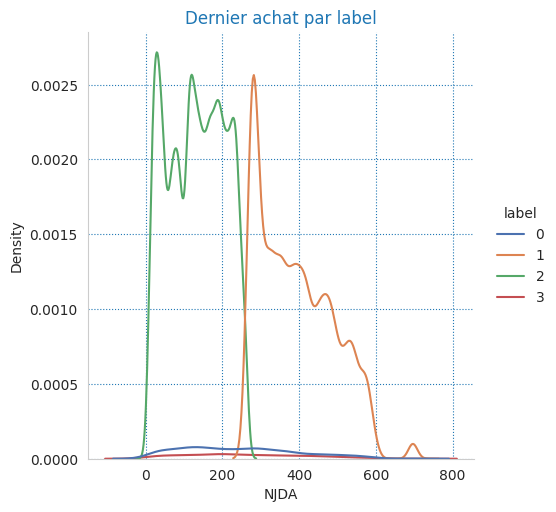

In [50]:
fig = plt.figure(figsize=(3,4))
sns.displot(df_graph, x='NJDA', kind="kde", hue = 'label', palette = palette)
plt.title("Dernier achat par label", c = 'tab:blue')
plt.show()

In [51]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca.fit(X)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X)
graph_df = pd.DataFrame ({'F1' : X_trans[:,0],
                          'F2' :X_trans[:,1],
                          'label':kmeans_cl.labels_})
graph_df

[0.35001162 0.68313862]


,F1,F2,label
0,0.219168,0.116883,1
1,-0.206698,-1.198527,2
2,-0.543827,-1.229631,2
3,1.259978,-0.980232,2
4,-1.319169,0.859796,1
...,...,...,...
93367,0.632778,2.128127,1
93368,1.062435,-0.709814,2
93369,-0.056758,-1.032909,2
93370,0.097403,-0.468923,2


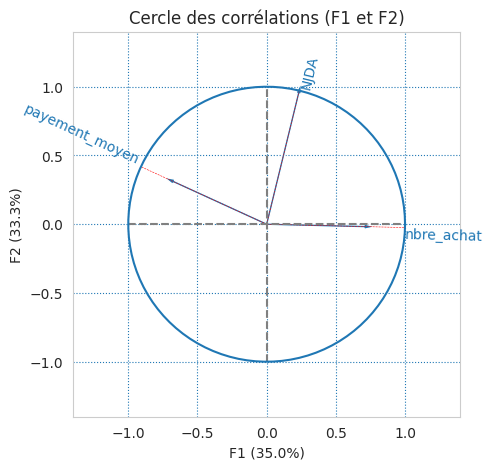

In [52]:
x_y =(0,1)
correlation_graph(pca, x_y, features, figsize = (5,5))

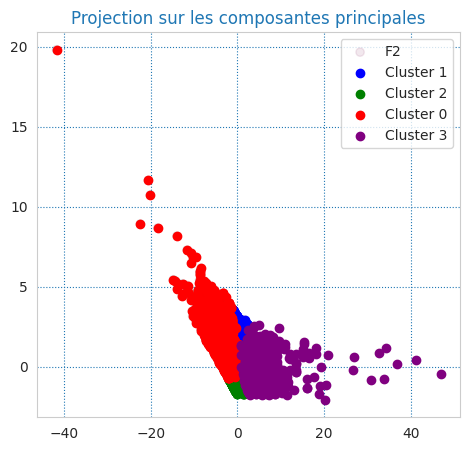

In [53]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
# tracer les points en utilisant les couleurs des labels
ax.scatter(data =graph_df, x ='F1', y = 'F2' , c=graph_df['label'], alpha = 0.1)

plt.title('Projection sur les composantes principales', c ="tab:blue")

# Tracer les points en utilisant les couleurs des labels
unique_labels = graph_df['label'].unique()
cmap = ListedColormap(['red', 'blue', 'green', 'purple', 'orange'])
for label in unique_labels:
    mask = graph_df['label'] == label
    ax.scatter(x='F1', y='F2', data=graph_df[mask], color=cmap(label), label=f"Cluster {label}")
ax.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

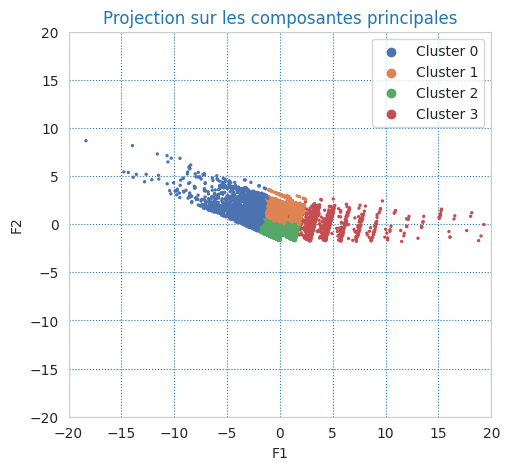

In [54]:

# définir une liste de couleurs pour chaque label
colors = [sns.color_palette('deep')[i] for i in [0,1,2,3]]

# créer la figure et le sous-tracé
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)

# tracer les points en utilisant les couleurs des labels
ax.scatter(X_trans[:,0], X_trans[:,1],s= 2, color=[colors[label] for label in kmeans_cl.labels_])
plt.xlabel('F1')
plt.ylabel('F2')
plt.xlim(-20,20)
plt.ylim(-20,20)

plt.title('Projection sur les composantes principales', c ="tab:blue")
# ajouter une légende
for i, color in enumerate(colors):
    ax.scatter([], [], c=color, label='Cluster {}'.format(i))
ax.legend()

In [55]:
X_trans[:,0]

array([ 0.21916778, -0.20669811, -0.54382669, ..., -0.05675813,
        0.09740279,  0.16635071])

## 3.2 clusters n = 5

In [56]:
kmeans_cl5 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, random_state = 0, algorithm = "elkan")
kmeans_cl5.fit(X)

KMeans(algorithm='elkan', n_clusters=5, random_state=0)

In [57]:
customers_df['label'] = kmeans_cl5.labels_
customers_df['label'].value_counts()
pd.DataFrame({'labels' :customers_df['label'].value_counts().index ,
              ' Nb individu' : customers_df['label'].value_counts()}).sort_values(by = 'labels')

,labels,Nb individu
0,0,49098
1,1,5410
2,2,36052
3,3,2754
4,4,58


## 3.2.1 analyse metiers sur les clusters

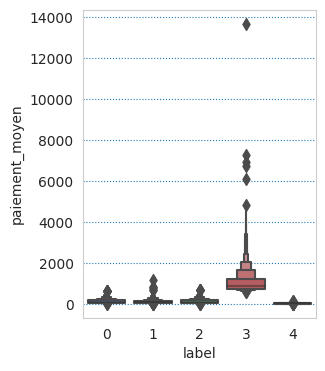

In [58]:
df_graph = customers_df
fig = plt.figure(figsize=(3,4))
sns.boxenplot(data = df_graph, x = 'label', y='paiement_moyen', palette = palette)
plt.show()

<Figure size 300x400 with 0 Axes>

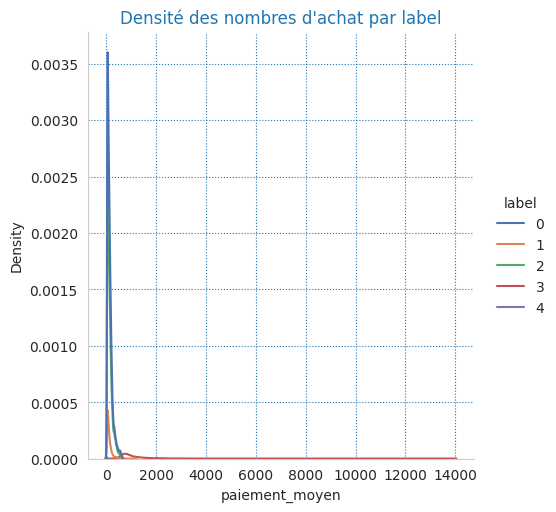

In [59]:
fig = plt.figure(figsize=(3,4))
sns.displot(df_graph, x='paiement_moyen', kind="kde", hue = 'label', palette = palette)
plt.title("Densité des nombres d'achat par label", c = 'tab:blue')
plt.show()

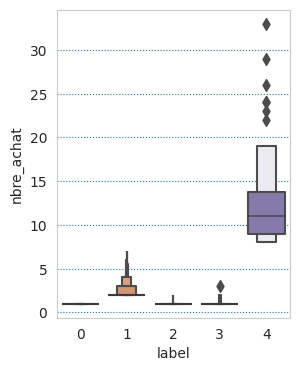

In [60]:
fig = plt.figure(figsize=(3,4))
sns.boxenplot(data = df_graph, x = 'label', y='nbre_achat', palette = palette)
#plt.ylim(-1,25)
plt.show()

<Figure size 300x400 with 0 Axes>

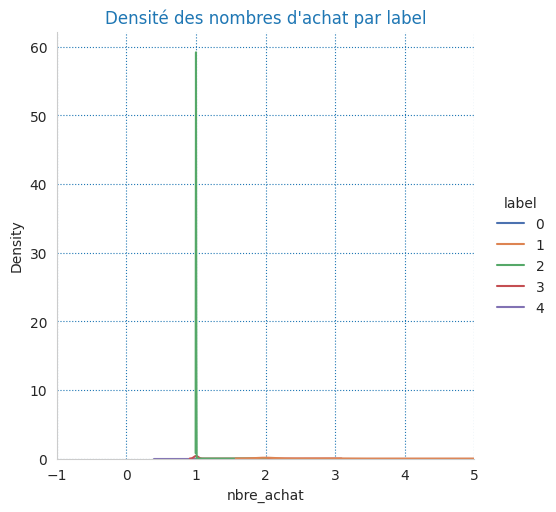

In [61]:
fig = plt.figure(figsize=(3,4))
sns.displot(df_graph, x='nbre_achat', kind="kde", hue = 'label', palette = palette)
plt.title("Densité des nombres d'achat par label", c = 'tab:blue')
plt.xlim(-1,5)
plt.show()

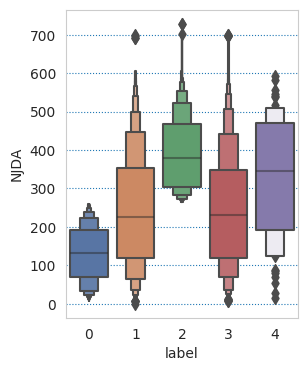

In [62]:
fig = plt.figure(figsize=(3,4))
sns.boxenplot(data = df_graph, x = 'label', y='NJDA', palette = palette)
plt.show()

<Figure size 300x400 with 0 Axes>

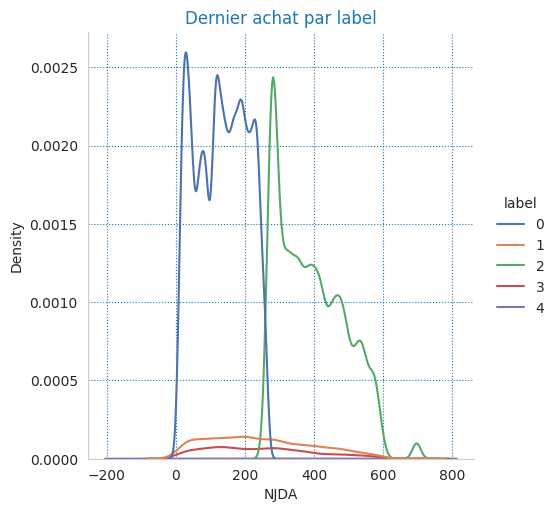

In [63]:
fig = plt.figure(figsize=(3,4))
sns.displot(df_graph, x='NJDA', kind="kde", hue = 'label', palette = palette)
plt.title("Dernier achat par label", c = 'tab:blue')
plt.show()

In [64]:
PCA.__init__

<function sklearn.decomposition._pca.PCA.__init__(self, n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)>

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X)

[0.35001162 0.68313862]


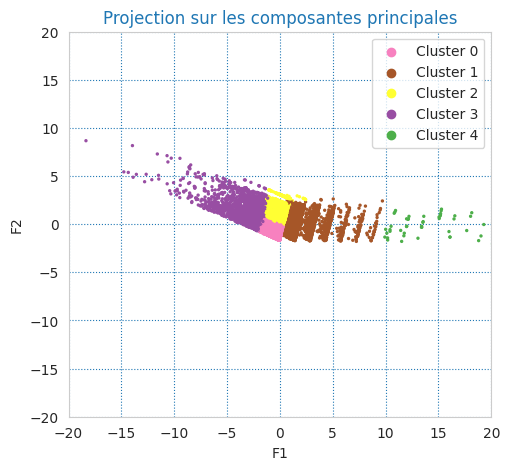

In [66]:
# définir une liste de couleurs pour chaque label
colors = [sns.color_palette('Set1_r')[i] for i in [0,1,2,3,4]]

# créer la figure et le sous-tracé
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)

# tracer les points en utilisant les couleurs des labels
ax.scatter(X_trans[:,0], X_trans[:,1],s = 2, color=[colors[label] for label in kmeans_cl5.labels_])
plt.xlabel('F1')
plt.ylabel('F2')
plt.xlim(-20,20)
plt.ylim(-20,20)

plt.title('Projection sur les composantes principales', color ="tab:blue")
# ajouter une légende
for i, color in enumerate(colors):
    ax.scatter([], [], color=color, label='Cluster {}'.format(i))
ax.legend()

### Visualisation des clusters avec des radarchart cluster = 4

In [67]:
#on remet les labels qu on avait obtenu avec 4 clusters
customers_df['label'] = kmeans_cl.labels_

In [68]:
customers_df.columns

Index(['customer_unique_id', 'nbre_achat', 'quantite_achat_max',
       'paiement_moyen', 'temps_livraison_moyen', 'review_score_moyen', 'NJDA',
       'label'],
      dtype='object')

In [69]:
customers_df['label'].value_counts()

2    51524
1    37816
0     2853
3     1179
Name: label, dtype: int64

In [70]:
pd.DataFrame({'clusters' :customers_df['label'].value_counts().index,
              'Nb clients' : customers_df['label'].value_counts()}).sort_values(by='clusters')

,clusters,Nb clients
0,0,2853
1,1,37816
2,2,51524
3,3,1179


In [71]:
customers_label_df = customers_df.groupby('label').agg({'nbre_achat': 'mean',
                                                        'paiement_moyen' : 'mean',
                                                        'temps_livraison_moyen' : 'mean',
                                                        'NJDA': 'mean',
                                                        'review_score_moyen':'mean',
                                                      
                                                       })
customers_label_df

,nbre_achat,paiement_moyen,temps_livraison_moyen,NJDA,review_score_moyen
label,,,,,
0,1.026288,1058.383707,14.520851,244.428321,3.889740
1,1.047969,130.100109,12.840126,392.520626,4.113636
2,1.047939,131.042188,12.050605,132.159207,4.110592
3,4.061069,88.908716,12.664113,258.735369,4.086432


In [72]:
#transformation des données en base 5
customers_label_base5_df = customers_label_df.copy()
for col in customers_label_df.columns:
    max = customers_label_df[col].max()
    min = 0
    customers_label_base5_df[col] = customers_label_df[col].apply(lambda x: round((x-min)/(max-min)*100,2))

In [73]:
 customers_label_base5_df.describe()

,nbre_achat,paiement_moyen,temps_livraison_moyen,NJDA,review_score_moyen
count,4.000000,4.000000,4.000000,4.000000,4.00000
mean,44.220000,33.267500,89.657500,65.465000,98.45750
std,37.187522,44.527004,7.278275,27.166176,2.61514
min,25.270000,8.400000,82.990000,33.670000,94.56000
25%,25.667500,11.317500,86.155000,55.120000,98.14500
50%,25.805000,12.335000,87.820000,64.095000,99.63500
75%,44.357500,34.285000,91.322500,74.440000,99.94750
max,100.000000,100.000000,100.000000,100.000000,100.00000


In [74]:
categories = customers_label_base5_df.columns.to_list()
categories = [*categories, categories[0]]

label_0 = customers_label_base5_df.iloc[0,:].to_list()
label_1 = customers_label_base5_df.iloc[1,:].to_list()
label_2 = customers_label_base5_df.iloc[2,:].to_list()
label_3 = customers_label_base5_df.iloc[3,:].to_list()

#on doit ajouter le premier element de la liste a la fin de la liste
label_0= [*label_0,label_0[0]]
label_1= [*label_1,label_1[0]]
label_2= [*label_2,label_2[0]]
label_3= [*label_3,label_3[0]]

In [75]:
#localisation du chaque catégorie dans le cercle
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(label_0))
label_loc

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       6.28318531])

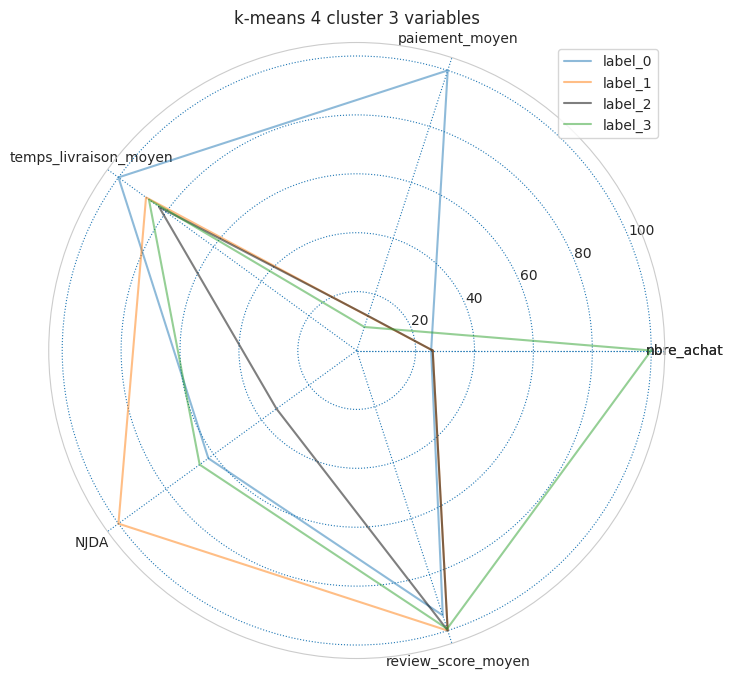

In [76]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc,label_0, label='label_0', alpha = 0.5)
plt.plot(label_loc,label_1, label='label_1',alpha = 0.5)
plt.plot(label_loc,label_2, label='label_2' , color ='black',alpha = 0.5)
plt.plot(label_loc,label_3, label='label_3',alpha = 0.5)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.title('k-means 4 cluster 3 variables')
plt.legend()
plt.show()

##  KMEANS cluster = 4 features = 5

In [77]:
features = ['NJDA','nbre_achat','paiement_moyen','temps_livraison_moyen', 'review_score_moyen']
X_plus = customers_scaled_df[features].values
kmeans_cl4 = KMeans(n_clusters = 4, init = "k-means++", algorithm = 'elkan')

In [78]:
#entrainement
kmeans_cl4_5f = kmeans_cl4.fit(X_plus)

In [79]:
customers_df

,customer_unique_id,nbre_achat,quantite_achat_max,paiement_moyen,temps_livraison_moyen,review_score_moyen,NJDA,label
0,d8eafc07c9e450d0bddbf75e0c6562ae,1,1,66.67,19.0,5.0,282,1
1,e4019dc45b2d51954e9cca5b62c83bb2,1,1,97.79,2.0,5.0,63,2
2,f3c66d5bafea434a46cc6006b62569cf,1,1,193.81,5.0,4.0,36,2
3,49c6b1ee895e59043bcd5e2135f08355,2,1,110.14,24.0,5.0,101,2
4,c7a63e95bffbc4a546a978662c374a88,1,1,567.34,2.0,5.0,287,1
...,...,...,...,...,...,...,...,...
93367,1ae78cd8cf034823e5cca58266ca894e,1,1,88.29,10.0,5.0,601,1
93368,76f7d40948174f5cde0fcf8e6147b59d,2,1,186.80,11.0,2.0,127,2
93369,e77d703d295d21601b46b7699b1e3633,1,1,65.81,10.0,5.0,97,2
93370,2f129fa019bca316504f1df58fb6116a,1,1,60.75,25.0,2.0,189,2


In [80]:
#on ajoute les labels dans la dataframe
customers_df['label_cl4_5f'] = kmeans_cl4_5f.labels_
pd.DataFrame({'label' :customers_df['label_cl4_5f'].value_counts().index,
              'Nb individus' : customers_df['label_cl4_5f'].value_counts()}).sort_values(by = 'label')

,label,Nb individus
0,0,42781
1,1,15514
2,2,32878
3,3,2199


##  Analyse clusters

In [81]:
customers_df.head(5)

,customer_unique_id,nbre_achat,quantite_achat_max,paiement_moyen,temps_livraison_moyen,review_score_moyen,NJDA,label,label_cl4_5f
0,d8eafc07c9e450d0bddbf75e0c6562ae,1,1,66.67,19.0,5.0,282,1,2
1,e4019dc45b2d51954e9cca5b62c83bb2,1,1,97.79,2.0,5.0,63,2,0
2,f3c66d5bafea434a46cc6006b62569cf,1,1,193.81,5.0,4.0,36,2,0
3,49c6b1ee895e59043bcd5e2135f08355,2,1,110.14,24.0,5.0,101,2,0
4,c7a63e95bffbc4a546a978662c374a88,1,1,567.34,2.0,5.0,287,1,2


In [82]:
customers_df['nbre_achat'].mean()

1.0853360750546202

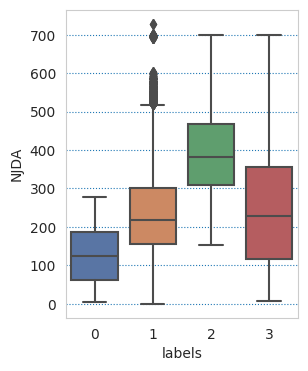

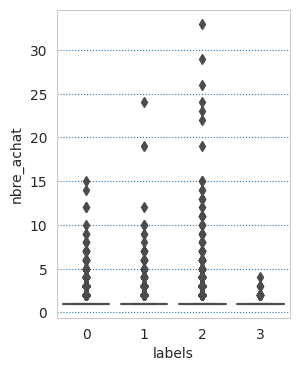

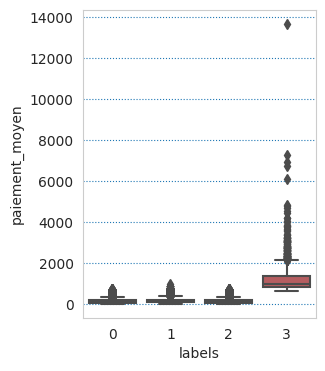

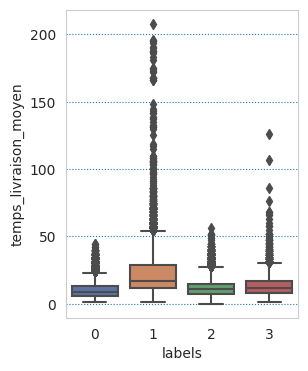

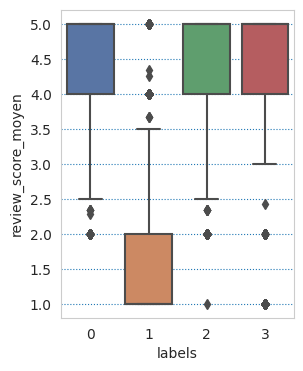

In [83]:
df_graph = customers_df

for variable in features : 
    fig = plt.figure(figsize=(3,4))
    sns.boxplot(data = df_graph, x = 'label_cl4_5f', y=variable, palette = palette)
    plt.xlabel('labels')
    plt.ylabel(variable)
    
    plt.show()

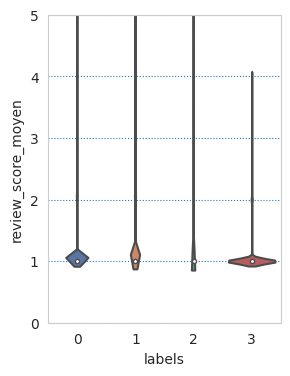

In [84]:
fig = plt.figure(figsize=(3,4))
sns.violinplot(data = df_graph, x = 'label_cl4_5f', y='nbre_achat', palette = palette)
plt.xlabel('labels')
plt.ylabel(variable)
plt.ylim(0,5)
plt.show()

In [85]:
np.sort(df_graph['label'].unique())

array([0, 1, 2, 3], dtype=int32)

In [86]:
for i in np.sort(df_graph['label'].unique()):
        print(f"cluster {i} le nombre d'achat max est {df_graph[df_graph['label']== i]['nbre_achat'].max()}")

cluster 0 le nombre d'achat max est 3
cluster 1 le nombre d'achat max est 2
cluster 2 le nombre d'achat max est 2
cluster 3 le nombre d'achat max est 33


In [87]:
df_graph[df_graph['label']== i]['nbre_achat'].value_counts()

3     709
4     243
5      84
6      56
7      29
8      11
9      10
11      7
10      7
12      5
13      3
14      3
15      3
24      2
19      2
23      1
33      1
29      1
22      1
26      1
Name: nbre_achat, dtype: int64

## Approche ACP

In [88]:
from sklearn.decomposition import PCA
pca_plus = PCA(n_components = 2)
pca_plus.fit(X_plus)

PCA(n_components=2)

In [89]:
print(pca_plus.explained_variance_ratio_.cumsum())
X_plus_trans = pca_plus.transform(X_plus)

[0.27196122 0.48159709]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

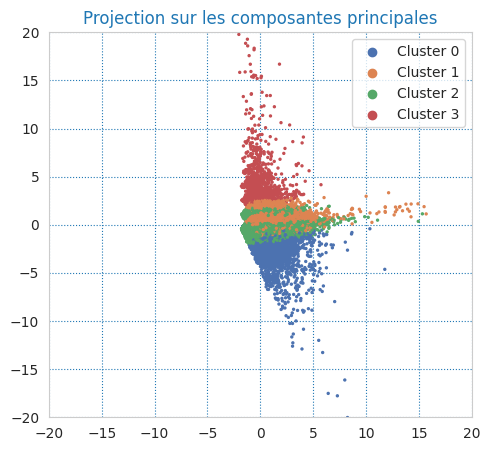

In [90]:
# définir une liste de couleurs pour chaque label
colors = [sns.color_palette('deep')[i] for i in [0,1,2,3]]

# créer la figure et le sous-tracé
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)

# tracer les points en utilisant les couleurs des labels
ax.scatter(X_plus_trans[:,0], X_plus_trans[:,1],s= 2, color=[colors[label] for label in kmeans_cl.labels_])
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title('Projection sur les composantes principales', c ="tab:blue")
# ajouter une légende
for i, color in enumerate(colors):
    ax.scatter([], [], c=color, label='Cluster {}'.format(i))
ax.legend()

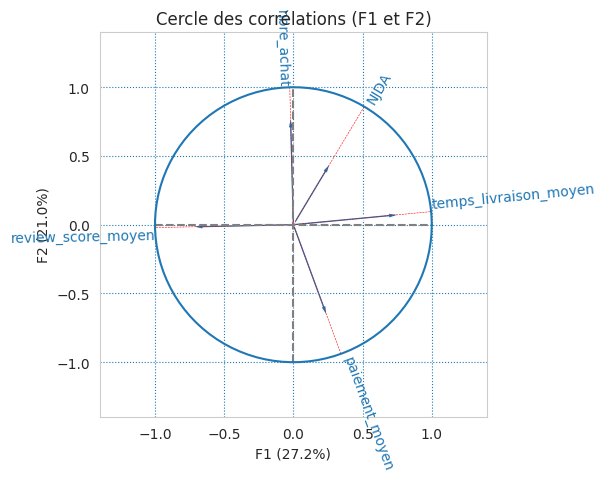

In [91]:
x_y =(0,1)
correlation_graph(pca_plus, x_y, features, figsize = (5,5))

In [92]:
customers_label_cl4_5f_df = customers_df.groupby('label_cl4_5f').agg({'nbre_achat': 'mean',
                                                        'paiement_moyen' : 'mean',
                                                        'temps_livraison_moyen' : 'mean',
                                                        'NJDA': 'mean',
                                                        'review_score_moyen':'mean',
                                                      
                                                       })
customers_label_cl4_5f_df

,nbre_achat,paiement_moyen,temps_livraison_moyen,NJDA,review_score_moyen
label_cl4_5f,,,,,
0,1.077885,129.494172,9.815439,126.335710,4.637004
1,1.079863,153.754538,21.248994,241.855743,1.611226
2,1.101405,130.123759,11.637842,394.196484,4.592982
3,1.028649,1179.003393,13.922870,244.667576,4.042972


In [93]:
#la moyenne du nombre des achats est proche de 1, on va mettre ces valeurs au carrée
customers_label_cl4_5f_base100_df = customers_label_cl4_5f_df.copy()
customers_label_cl4_5f_base100_df['nbre_achat'] = customers_label_cl4_5f_base100_df['nbre_achat'].apply(lambda x: x**10)

In [94]:
customers_label_cl4_5f_base100_df

,nbre_achat,paiement_moyen,temps_livraison_moyen,NJDA,review_score_moyen
label_cl4_5f,,,,,
0,2.117018,129.494172,9.815439,126.335710,4.637004
1,2.156195,153.754538,21.248994,241.855743,1.611226
2,2.627067,130.123759,11.637842,394.196484,4.592982
3,1.326398,1179.003393,13.922870,244.667576,4.042972


In [95]:
customers_label_cl4_5f_df['nbre_achat'].max()

1.1014051949631973

In [96]:
#transformation des données en base 100
for col in customers_label_cl4_5f_df.columns:
    max = customers_label_cl4_5f_base100_df[col].max()
    min = 0
    customers_label_cl4_5f_base100_df[col] = customers_label_cl4_5f_base100_df[col].apply(lambda x: round((x-min)/(max-min)*100,2))

In [97]:
customers_label_cl4_5f_base100_df

,nbre_achat,paiement_moyen,temps_livraison_moyen,NJDA,review_score_moyen
label_cl4_5f,,,,,
0,80.58,10.98,46.19,32.05,100.00
1,82.08,13.04,100.00,61.35,34.75
2,100.00,11.04,54.77,100.00,99.05
3,50.49,100.00,65.52,62.07,87.19


In [98]:
categories = customers_label_cl4_5f_df.columns.to_list()
categories = [*categories, categories[0]]

label_0 = customers_label_cl4_5f_base100_df.iloc[0,:].to_list()
label_1 = customers_label_cl4_5f_base100_df.iloc[1,:].to_list()
label_2 = customers_label_cl4_5f_base100_df.iloc[2,:].to_list()
label_3 = customers_label_cl4_5f_base100_df.iloc[3,:].to_list()

#on doit ajouter le premier element de la liste a la fin de la liste
label_0= [*label_0,label_0[0]]
label_1= [*label_1,label_1[0]]
label_2= [*label_2,label_2[0]]
label_3= [*label_3,label_3[0]]

In [99]:
#localisation du chaque catégorie dans le cercle
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(label_0))
label_loc

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       6.28318531])

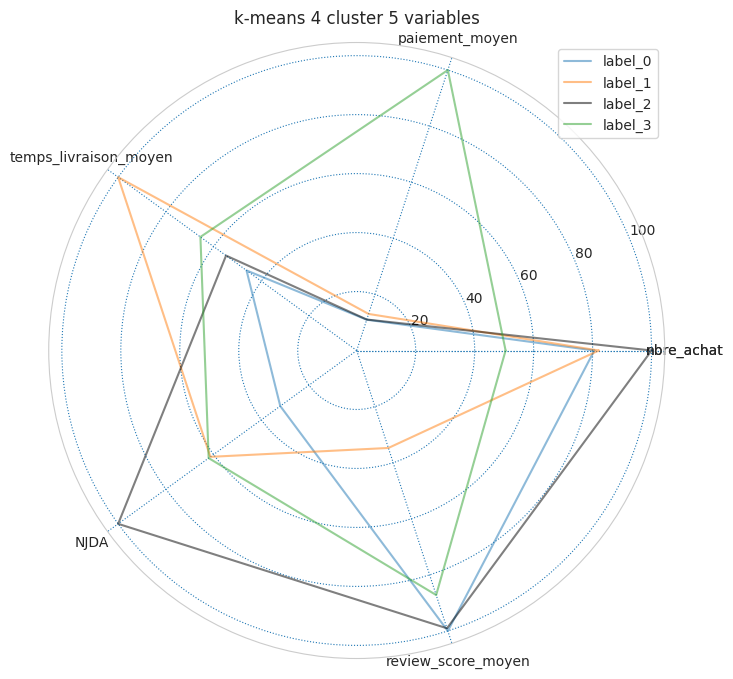

In [100]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc,label_0, label='label_0', alpha = 0.5)
plt.plot(label_loc,label_1, label='label_1',alpha = 0.5)
plt.plot(label_loc,label_2, label='label_2' , color ='black',alpha = 0.5)
plt.plot(label_loc,label_3, label='label_3',alpha = 0.5)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.title('k-means 4 cluster 5 variables')
plt.legend()
plt.show()

## DBSCAN

In [101]:
from sklearn.cluster import DBSCAN
DBSCAN.__init__

<function sklearn.cluster._dbscan.DBSCAN.__init__(self, eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)>

In [102]:
dbscan_clg = DBSCAN(eps =0.5,min_samples = 20).fit(X)

In [103]:
dbscan_clg.labels_
customers_scaled_df['DBSCAN_labels'] = dbscan_clg.labels_

customers_scaled_df['DBSCAN_labels'].value_counts()

 0    87380
 1     4274
 2      681
-1      490
 5      257
 3      226
 4       64
Name: DBSCAN_labels, dtype: int64

In [104]:
customers_scaled_df['DBSCAN_labels'] = dbscan_clg.labels_
pd.DataFrame({'clusters':customers_scaled_df['DBSCAN_labels'].value_counts().index,
              'Nb clients' : customers_scaled_df['DBSCAN_labels'].value_counts()
             })

,clusters,Nb clients
0,0,87380
1,1,4274
2,2,681
-1,-1,490
5,5,257
3,3,226
4,4,64


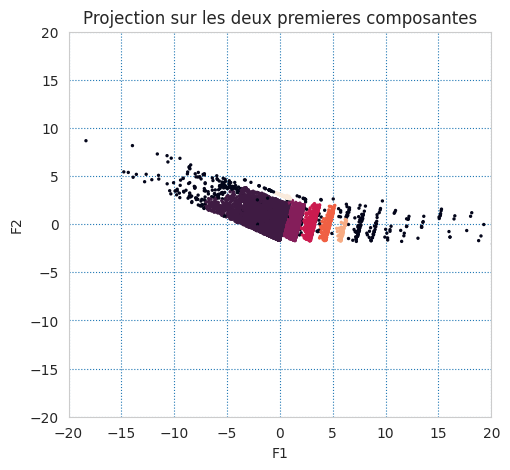

In [105]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,0], X_trans[:,1],s = 2, c=dbscan_clg.labels_)
plt.title('Projection sur les deux premieres composantes')
plt.xlabel('F1')
plt.ylabel('F2')
plt.xlim(-20,20)
plt.ylim(-20,20)

plt.show()

In [106]:
from sklearn.cluster import DBSCAN
dbscan_clg2 = DBSCAN(eps =0.5,min_samples = 200).fit(X)
dbscan_clg2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
customers_scaled_df['DBSCAN_labels'].value_counts().index

Int64Index([0, 1, 2, -1, 5, 3, 4], dtype='int64')

In [108]:
customers_scaled_df['DBSCAN2_labels'] = dbscan_clg2.labels_
pd.DataFrame({'clusters':customers_scaled_df['DBSCAN2_labels'].value_counts().index,
              'Nb clients' : customers_scaled_df['DBSCAN2_labels'].value_counts()
             })

,clusters,Nb clients
0,0,86331
1,1,4117
-1,-1,2394
3,3,313
2,2,217


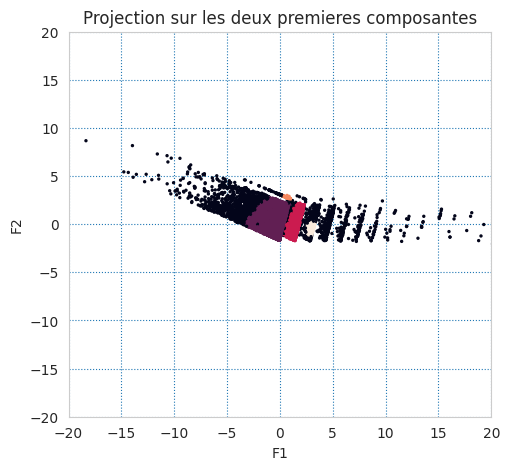

In [109]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.scatter(X_trans[:,0], X_trans[:,1],s=2, c=dbscan_clg2.labels_)
plt.title('Projection sur les deux premieres composantes')
plt.xlabel('F1')
plt.ylabel('F2')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()